In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
input_dir1 = './MPD_dataset/MPD_events'
input_dir2 = './answers'

ratio_list = []

for evtid in range(800, 1000):
    event_name = input_dir1 + f'/event_{evtid}_'
    answer_name = input_dir2 + f'/answer_{evtid-800}.csv'
    print(f'Processing: {event_name:s} & {answer_name:s}')

    hits = pd.read_csv(event_name + 'hits.csv')
    pred = pd.read_csv(answer_name)
    if not hits.empty:
        hits = hits[['hit_id', 'row_id', 'sector_id']]
        
        tracks = pd.read_csv(event_name + 'tracks.csv')
        truth = pd.read_csv(event_name + 'truth.csv')

        truth = truth.merge(tracks, on='track_id')
        hits = hits.merge(truth, on='hit_id')
        
        hits = hits[(hits['pt'] >= 0.15) & (hits['mother_id'] == -1)]

        if not hits.empty:
            track_ids = set(hits["track_id"])

            ratio = []
            
            for tr in track_ids:
                track_hits = hits[hits["track_id"] == tr].copy().sort_values('row_id')
    
                pairs = pd.DataFrame({'hit_id_1': track_hits['hit_id'],
                                      'hit_id_2': track_hits['hit_id'].shift(-1),
                                      'row_id_1': track_hits['row_id'],
                                      'row_id_2': track_hits['row_id'].shift(-1),
                                      'sector_id_1': track_hits['sector_id'],
                                      'sector_id_2': track_hits['sector_id'].shift(-1)})

                pairs = pairs.dropna().astype({'hit_id_1': int,
                                               'hit_id_2': int,
                                               'row_id_1': int,
                                               'row_id_2': int,
                                               'sector_id_1': int,
                                               'sector_id_2': int})

                valid_pairs = pairs[(pairs['row_id_1'] + 1 == pairs['row_id_2']) & 
                                    (pairs['sector_id_1'] == pairs['sector_id_2'])]

                track_seg_num = valid_pairs[['row_id_1', 'row_id_2']].drop_duplicates().shape[0]

                merged = valid_pairs.merge(pred, left_on=['hit_id_1', 'hit_id_2'],
                                                 right_on=['in_hit_id', 'out_hit_id'])

                pred_seg_num = merged[['row_id_1', 'row_id_2']].drop_duplicates().shape[0]

                ratio.append(pred_seg_num / track_seg_num if track_seg_num else 0)
            
            ratio_list.append(ratio)


Processing: ./MPD_dataset/MPD_events/event_800_ & ./answers/answer_0.csv
Processing: ./MPD_dataset/MPD_events/event_801_ & ./answers/answer_1.csv
Processing: ./MPD_dataset/MPD_events/event_802_ & ./answers/answer_2.csv
Processing: ./MPD_dataset/MPD_events/event_803_ & ./answers/answer_3.csv
Processing: ./MPD_dataset/MPD_events/event_804_ & ./answers/answer_4.csv
Processing: ./MPD_dataset/MPD_events/event_805_ & ./answers/answer_5.csv
Processing: ./MPD_dataset/MPD_events/event_806_ & ./answers/answer_6.csv
Processing: ./MPD_dataset/MPD_events/event_807_ & ./answers/answer_7.csv
Processing: ./MPD_dataset/MPD_events/event_808_ & ./answers/answer_8.csv
Processing: ./MPD_dataset/MPD_events/event_809_ & ./answers/answer_9.csv
Processing: ./MPD_dataset/MPD_events/event_810_ & ./answers/answer_10.csv
Processing: ./MPD_dataset/MPD_events/event_811_ & ./answers/answer_11.csv
Processing: ./MPD_dataset/MPD_events/event_812_ & ./answers/answer_12.csv
Processing: ./MPD_dataset/MPD_events/event_813_ 

In [3]:
print(ratio_list[1])

[0.9512195121951219, 0.9038461538461539, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9803921568627451, 0.6875, 0.9615384615384616, 0.125, 1.0, 1.0, 0.9565217391304348, 0.9411764705882353, 0.94, 0.96, 0.9791666666666666, 0.9787234042553191, 0.9423076923076923, 0.94, 0.98, 0.673469387755102, 0.9130434782608695, 1.0, 0.8181818181818182, 1.0, 1.0, 1.0, 0.9230769230769231, 1.0, 0.9473684210526315, 0.9615384615384616, 0.88, 0.9361702127659575, 0.9183673469387755, 1.0, 0.9423076923076923, 0.9166666666666666, 1.0, 1.0, 1.0, 0.9428571428571428, 1.0, 0.9487179487179487, 0.625, 1.0, 0.7272727272727273, 0.7894736842105263, 0.9411764705882353, 0.36363636363636365, 0.98, 0.9807692307692307, 0.9791666666666666, 0.6206896551724138, 1.0, 1.0, 1.0, 0.46153846153846156, 1.0, 0.8723404255319149, 0.9807692307692307, 1.0, 1.0, 0.9512195121951219, 1.0, 0.6153846153846154, 1.0, 1.0, 0.8936170212765957, 0.9375, 1.0, 0.9375, 0.8846153846153846, 1.0, 0.98, 1.0, 1.0, 0.9807692307692307, 1.0, 1.0

In [4]:
xlist = list(range(50, 102, 2))

eff = [0] * len(xlist)

for row in ratio_list:
    for i, x in enumerate(xlist):
        eff[i] += sum(1 for num in row if num >= x/100) / len(row) * 100

for i in range(len(eff)):
    eff[i] /= len(ratio_list)

In [5]:
eff

[97.04210895371402,
 96.46853616024922,
 96.36954568626074,
 96.22146080698057,
 95.99981786487942,
 95.85525084162214,
 95.57544679535836,
 95.325688535103,
 95.06772888030208,
 94.24638461841877,
 93.9768586945233,
 93.3590309402448,
 92.72431641402967,
 91.94701299014619,
 91.13597915507161,
 90.39639275393723,
 88.85252911957443,
 87.0298123294034,
 84.48583984948975,
 82.07612738034337,
 79.3280678665525,
 75.39849370384697,
 69.70939655160939,
 62.261371803174164,
 53.06884997899708,
 48.10392464082218]

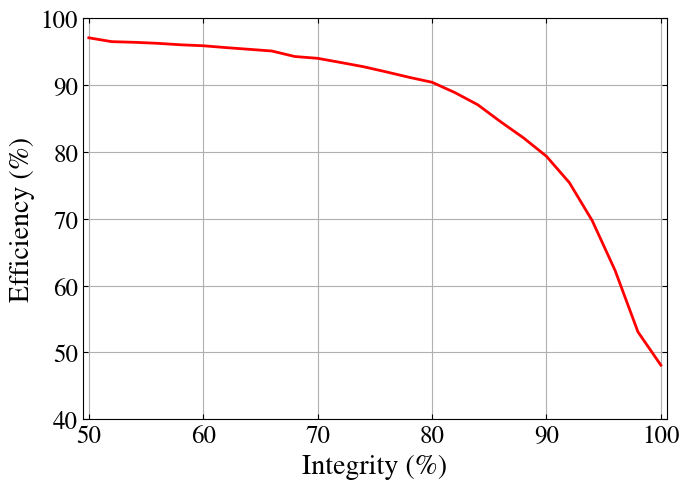

In [25]:
with plt.rc_context({'font.family': 'Nimbus Roman'}):
    plt.figure(figsize=(7, 5))
    plt.plot(xlist, eff, alpha=1, label='Efficiency', linewidth=2, color='red')
    plt.xlim([49.5, 100.5])
    plt.ylim([40, 100])
    plt.xlabel('Integrity (%)', fontsize=20)
    plt.ylabel('Efficiency (%)', fontsize=20)
    plt.tick_params(axis='both', 
                    which='major', 
                    labelsize=18,
                    top=True,
                    bottom=True,
                    left=True,
                    right=True,
                    direction='in')
    plt.yticks(np.arange(40, 110, 10))
    plt.grid(True)
    plt.tight_layout()
    #plt.show()
    plt.savefig("Efficiency_vs_Integrity.pdf")